# Solar Panal - Regression

### Objective

The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

## Data Set Description

The file solarpowergeneration.csv contains the data for this example. Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920. We have the following variables for this analysis:
+ distance_to_solar_noon, in radians.
+ temperature, daily average temperature, in degrees Celsius.
+ wind_direction, daily average wind direction, in degrees (0-360).
+ wind_speed, daily average wind speed, in meters per second.
+ sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.
+ visibility, in kilometers.
+ humidity, in percentage.
+ average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.
+ average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.
+ power_generated(Target), in Jules for each 3 hours

### EDA

In [1]:
import pandas as pd
import numpy as np

# Loading the dataset.
df = pd.read_csv("solarpowergeneration.csv")

In [2]:
# Printing the head of dataset.
df.head(3)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418


###### Examine the data

In [3]:
# Generating the information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


In [4]:
# Summary
print(df.describe())

       distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.0000

In [5]:
# shape is printed to check number of columns and rows.
df.shape

(2920, 10)

In [6]:
# printing columns names.
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [7]:
# Checking for missing values
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [8]:
# Contains null value so handeling it by taking median and filling the null value
df.fillna(df.median(), inplace=True)

In [9]:
# checking for missing values agaun, no more null values.
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [10]:
# Check for duplicate rows
df.duplicated()
#No duplicate values

0       False
1       False
2       False
3       False
4       False
        ...  
2915    False
2916    False
2917    False
2918    False
2919    False
Length: 2920, dtype: bool

###### Data visualization to understand relationship b/w columns

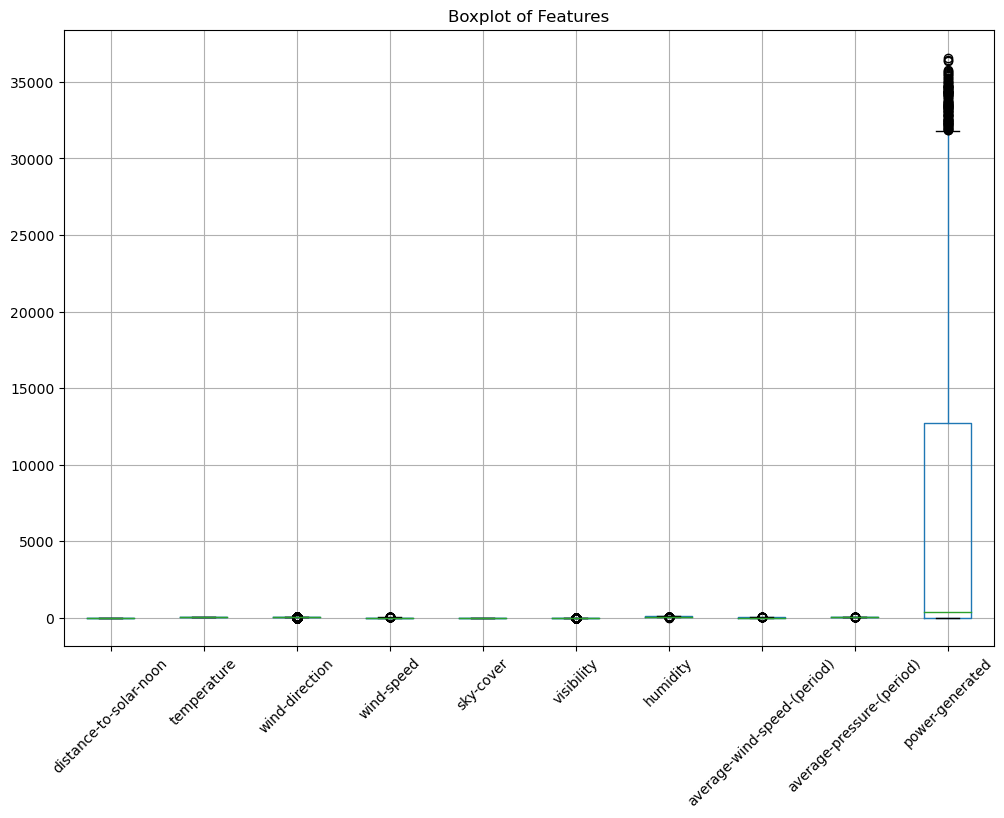

In [11]:
import matplotlib.pyplot as plt
# Boxplots helps detect Outlier Detection 
plt.figure(figsize=(12, 8))
df.boxplot(rot=45)
plt.title("Boxplot of Features")
plt.show()

In [12]:
# Since power-generated contains outliers.
df['power-generated'].describe()

count     2920.000000
mean      6979.846233
std      10312.336413
min          0.000000
25%          0.000000
50%        404.000000
75%      12723.500000
max      36580.000000
Name: power-generated, dtype: float64

In [13]:
Q1 = df['power-generated'].quantile(0.25)
Q3 = df['power-generated'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
Q1, Q3, IQR

(0.0, 12723.5, 12723.5)

In [15]:
lower_bound,upper_bound

(-19085.25, 31808.75)

In [16]:
df = df[(df['power-generated'] >= lower_bound) & (df['power-generated'] <= upper_bound)]

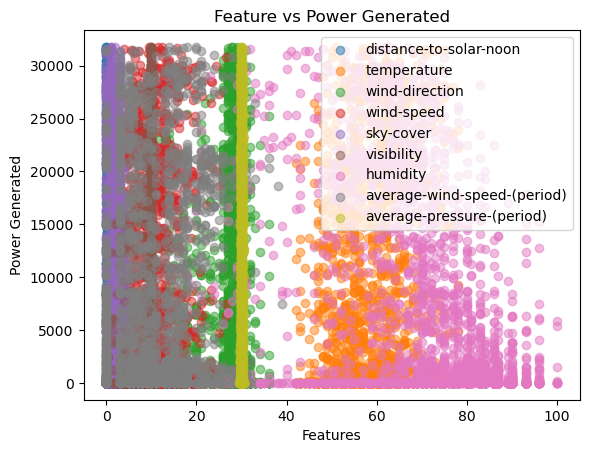

In [17]:
# Scatter plots to show relationships with power generation
for column in df.columns[:-1]:  # Excluding target variable
    plt.scatter(df[column], df['power-generated'], alpha=0.5, label=column)
plt.legend()
plt.xlabel("Features")
plt.ylabel("Power Generated")
plt.title("Feature vs Power Generated")
plt.show()

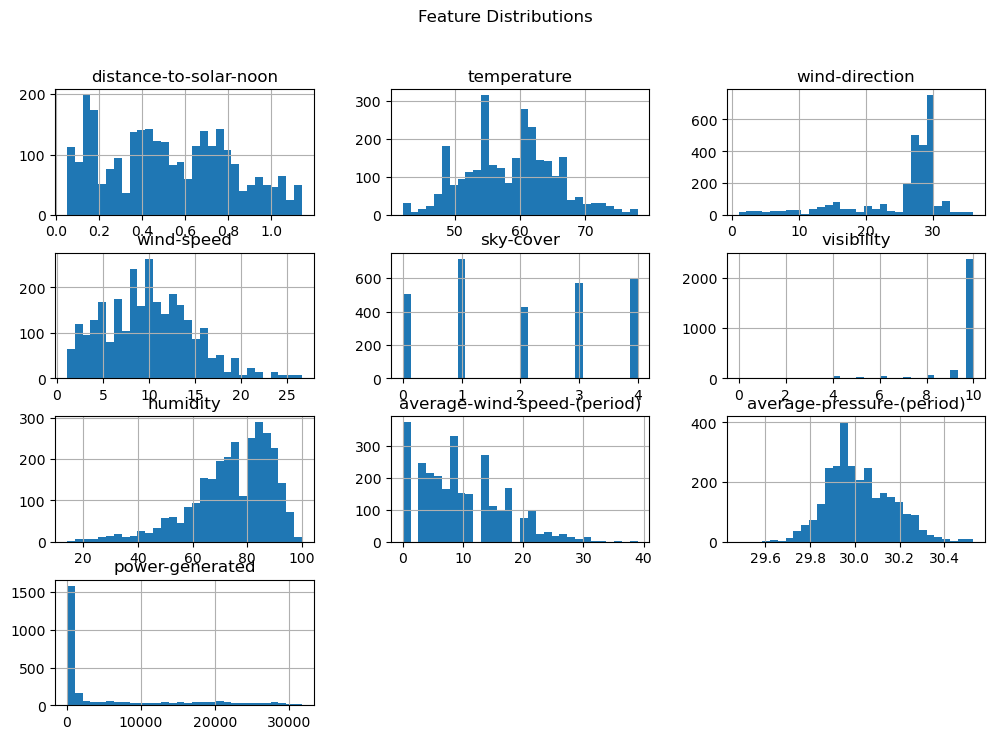

In [18]:
# Histograms shows feature distributions code
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

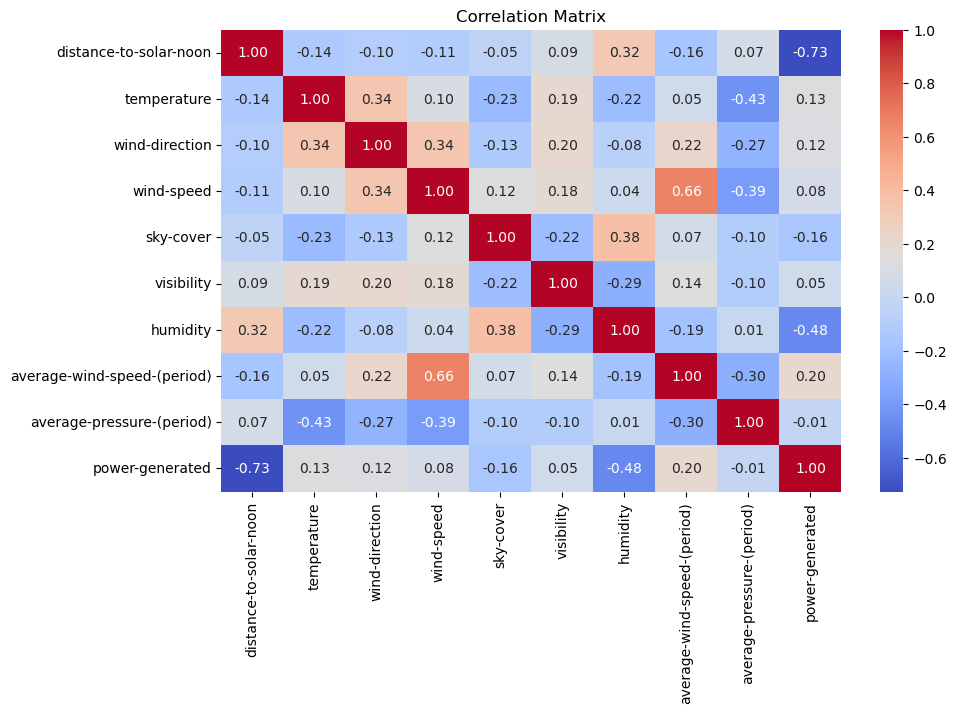

In [19]:
import seaborn as sns
# Correlation helps identify dependencies in data.
correlation_matrix = df.corr()
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

###### Standardization ensures all features have a mean of 0 and a standard deviation of 1, preventing scale bias and improving model performance. 

In [20]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['power-generated'])), columns=df.columns[:-1])
df_scaled['power-generated'] = df['power-generated']

### Model Building

In [21]:
# Define features and target variable
X = df.drop(columns=['power-generated'])  
y = df['power-generated']

In [22]:
# Spliting the dataset into train and test ratio 80-20.
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###### Model Selection 

In [23]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
model = rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

###### Model Evaluation 
+ a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R² Score: 0.580226751066192
Linear Regression RMSE: 5958.607623454937


In [26]:
print("\nRandom Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R² Score: 0.8586700078282037
Random Forest RMSE: 3457.439394007275


###### Here Random Forest model work better so considering that.

+ b.Visualization

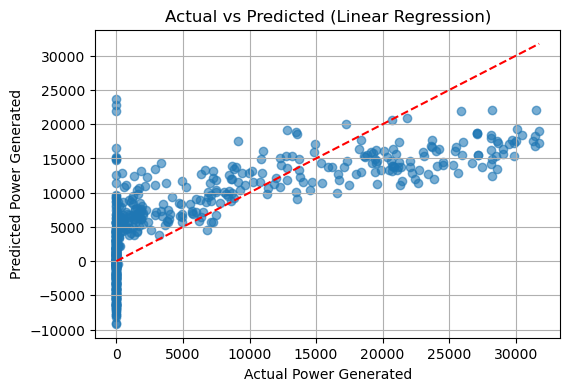

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.show()

###### Model Deployment

In [28]:
from pickle import dump

In [29]:
dump(model, open('reg.pkl','wb'))